In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

In [2]:
df = pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
df.columns #Display Column names

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
df.head() #Display the first 5 rows

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.info() #Summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe() #Desciptive Statistics

In [ ]:
df.dtypes #Datatypes of each column

In [ ]:
df.nunique() #Number of unique values in each column

In [6]:
df.City.unique() #Unique values in 'City'

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [7]:
print(df['City'].value_counts())  

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64


In [9]:
print(df['AQI_Bucket'].value_counts())

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64


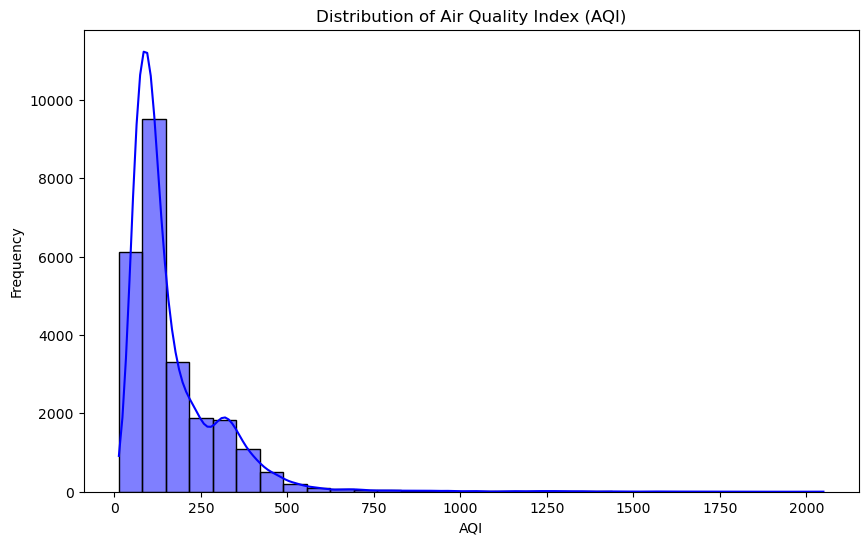

In [8]:
#Histogram with a KDE Curve
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

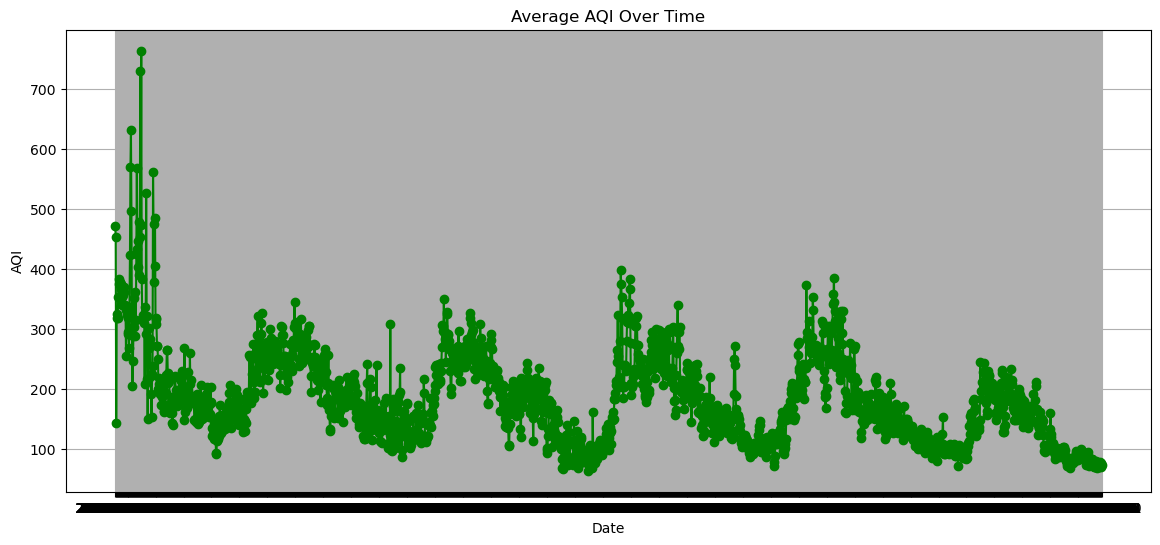

In [10]:
#Line Plot
daily_aqi = df.groupby('Date')['AQI'].mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_aqi.index, daily_aqi.values, marker='o', linestyle='-', color='green')
plt.title('Average AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

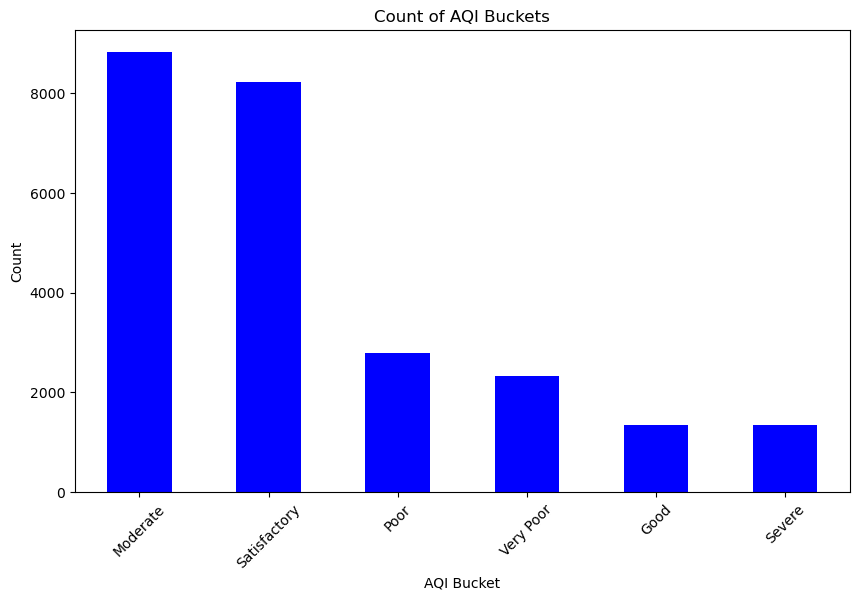

In [11]:
#Bar Plot
aqi_buckets_count = df['AQI_Bucket'].value_counts()
plt.figure(figsize=(10, 6))
aqi_buckets_count.plot(kind='bar', color='blue')
plt.title('Count of AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Identifying null values
df.isna().sum()

In [ ]:
df.City.value_counts()

In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
numerical_cols=pd.DataFrame(df.select_dtypes(exclude="object"))
numerical_cols

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()     #Handling missing values in numerical columns

imputed=imputer.fit_transform(numerical_cols)
imputed

In [ ]:
numerical_cols=pd.DataFrame(imputed,columns=numerical_cols.columns)
numerical_cols

In [ ]:
#df.drop('AQI_Bucket',axis=1,inplace=True)

categorical_cols=pd.DataFrame(df.select_dtypes(include='object'))

categorical_cols

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()       #Encoding categorical data to numerical values
encoded=le.fit_transform(categorical_cols)

encoded

In [ ]:
categorical_cols=pd.DataFrame(encoded,columns=categorical_cols.columns)
categorical_cols

In [ ]:
categorical_cols.columns

In [ ]:
numerical_cols.columns

In [ ]:
df = pd.concat([ categorical_cols,numerical_cols], axis=1)      #Concatenating the categorical and numerical columns
df

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
x=df.drop('AQI',axis=1)
x

In [ ]:
y=df['AQI']
y

In [ ]:
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
#We made a prediction and filled the predictions with the average of the AQI column
def guess_mean(inputs):
    return np.full(len(inputs), df.AQI.mean())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
model1=LinearRegression()
model1.fit(x_train, y_train)

# Predictions
y_train_pred = model1.predict(x_train)
y_test_pred = model1.predict(x_test)
    
# Training and Validation Scores
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"{model1} Results:")
print(f"Training MSE: {train_mse:.4f}, Training R^2: {train_r2:.4f}")
print(f"Validation MSE: {test_mse:.4f}, Validation R^2: {test_r2:.4f}")
print("-" * 40)

In [ ]:
model2=DecisionTreeRegressor()
model2.fit(x_train, y_train)

# Predictions
y_train_pred = model2.predict(x_train)
y_test_pred = model2.predict(x_test)
    
# Training and Validation Scores
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"{model2} Results:")
print(f"Training MSE: {train_mse:.4f}, Training R^2: {train_r2:.4f}")
print(f"Validation MSE: {test_mse:.4f}, Validation R^2: {test_r2:.4f}")
print("-" * 40)

In [ ]:
model3=RandomForestRegressor()
model3.fit(x_train, y_train)

# Predictions
y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)
    
# Training and Validation Scores
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"{model3} Results:")
print(f"Training MSE: {train_mse:.4f}, Training R^2: {train_r2:.4f}")
print(f"Validation MSE: {test_mse:.4f}, Validation R^2: {test_r2:.4f}")
print("-" * 40)

In [ ]:
model4=SVR()
model4.fit(x_train, y_train)

# Predictions
y_train_pred = model4.predict(x_train)
y_test_pred = model4.predict(x_test)
    
# Training and Validation Scores
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"{model4} Results:")
print(f"Training MSE: {train_mse:.4f}, Training R^2: {train_r2:.4f}")
print(f"Validation MSE: {test_mse:.4f}, Validation R^2: {test_r2:.4f}")
print("-" * 40)

In [ ]:
import pickle

#Saving the RandomForestRegressor model
with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(model3, file)

In [ ]:
#Loading the saved RandomForestClassifier model
with open('random_forest_regressor.pkl', 'rb') as file:
    model3 = pickle.load(file)

In [106]:
df['AQI'] = model3.predict(x)

In [107]:
# Save the DataFrame with predictions to a new CSV file
df.to_csv('air_quality_with_predictions.csv', index=False)